# Inferring A Fluorescence Calibration Factor 

(c) The authors. This work is licensed under the standard [CC-BY 4.0]() and all code herin is licensed under the standard [MIT]() permissive license.

---

In [1]:
import sys
import numpy as np
import pystan
import pandas as pd
import altair as alt
import bokeh.io
import bokeh.plotting
sys.path.insert(0, '../../')
import mwc.bayes
import mwc.stats

In this notebook, we infer the most-likely value for the calibration factor between fluorescence and protein copy number across a set of experiments.

## Derivation

## Inferential Model

## Implementation

In [2]:
# Load the fluctuation data. 
fluct_data = pd.read_csv('../../data/compiled_fluctuations.csv')

# Load the fold-change measurements 
fc_data = pd.read_csv('../../data/compiled_fold_change.csv')

# Add identifiers to the fluctuation data. 
idx = 1
for g, d in fluct_data.groupby(['carbon', 'date', 'run_no']):
    fluct_data.loc[(fluct_data['carbon']== g[0]) & (fluct_data['date']==g[1]) &
                  (fluct_data['run_no']==g[2]), 'idx'] = idx
    idx += 1

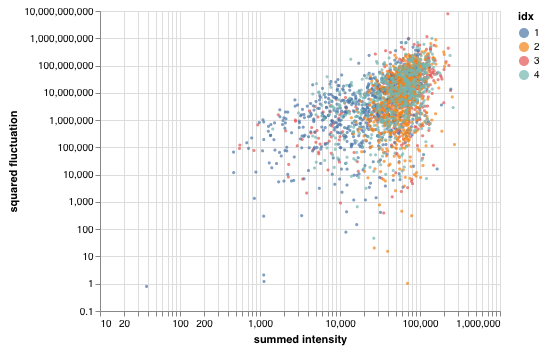

In [3]:
alt.Chart(fluct_data).mark_point(filled=True, size=10).encode(
    x=alt.X('summed:Q', scale={'type':'log', 'zero':False}, axis={'title': 'summed intensity'}),
    y=alt.Y('fluct:Q', scale={'type':'log', 'zero':False}, axis={'title': 'squared fluctuation'}),
    color='idx:N').interactive()

In [4]:
# Load the Stan model. 
model = mwc.bayes.loadStanModel('../stan/Hierarchical_calibration_factor.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f072b34577506dbc75c2fcdc6cc5983b NOW.


Precompiled model not found. Compiling model...
finished!


In [8]:
# Assemble the sampling data dictionary. 
data_dict = dict(J_media=1, J_run=len(fluct_data['idx'].unique()), N=len(fluct_data),
                media_idx=np.ones(len(fluct_data)).astype(int), run_idx=fluct_data['idx'].values.astype(int),
                I_1=fluct_data['I_1'], I_2=fluct_data['I_2'])

# Sample!
samples = model.sampling(data_dict, iter=1000, chains=4)

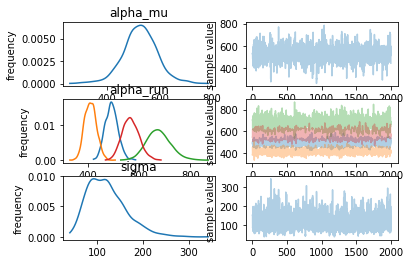

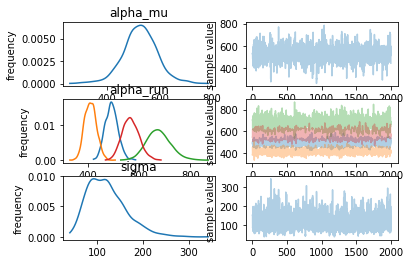

In [10]:
samples.plot()